# Lending Club Risk Analysis

In this problem, we are tasked with performing exploratory data analysis (EDA) on a dataset from a Consumer Finace Company. This club wants to minimize the risk of losing money while lending to customers. The dataset contains information about the bank's customers and their loan-related attributes such as  income, loan amount, interest rate, and whether the loan was defaulted or not, etc.

The objective is to understand the factors that contribute to loan default and identify the key indicators of default. By analyzing these factors, the bank aims to develop a better understanding of the risks associated with lending and make informed decisions to minimize credit losses.

To achieve this, we need to perform various tasks. First, we need to clean the data by handling missing values and transforming the data if required. Then, we will conduct exploratory data analysis to gain insights into the distribution of variables, identify any patterns, and understand the relationships between variables and loan default.

Visualization techniques will be used to present our findings effectively. By creating relevant visualizations, we can communicate insights to stakeholders and support our analysis.



Overall, the goal is to leverage EDA techniques and risk analytics to gain a deeper understanding of the factors driving loan default and provide actionable insights to the bank for effective risk management.



#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

#### Import loan data CSV file using pandas

In [2]:
loan_01 = pd.read_csv('loan.csv')

#### Check for sample data

In [3]:
loan_01.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
loan_01.shape

(39717, 111)

- Initial raw data contains **39717 rows and 111 columns**

### Data Handling and Cleaning

In next few steps involve making sure that there are no __missing values__ or __incorrect data types__  before we proceed to the analysis stage. These mentioned problems are handled as follows:

 - For Missing Values: 
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
 
    
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column
 

#### Get column information from given csv file

In [5]:
loan_01.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

- From the above information we can see that there are so many fields are having null values in whole dataset
- We need to drop those colomns for our analysis

In [6]:
loan_02 = loan_01.dropna(axis=1,how='all')

In [7]:
loan_02.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Droping columns which contains large number of null values in them

- From the above derivation we can see ***'desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d'*** these columns contians huge number of null values compare to others
- So won't help us in our analyis, droping those columns also

In [8]:
loan_02 = loan_02.drop(columns=['desc', 'mths_since_last_delinq','mths_since_last_record','next_pymnt_d'])

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Analyse loan_status field

In [10]:
loan_02.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

- We don't need rows of **Current**  value to analyse defaulter from the given dataset
- Removing rows loan_status as **Current**

In [11]:
loan_03 = loan_02[loan_02.loan_status != 'Current']

In [12]:
loan_03.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Some of the customer behaviour variables are not required to analyse the **Defaulters** in given data set
#### These behaviour variables will not be available at loan application time, So they won't be helpful at predition time
Below are the behaviour varibles need to remove
- delinq_2yrs                      0
- earliest_cr_line                 0
- inq_last_6mths                   0
- open_acc                         0
- pub_rec                          0
- revol_bal                        0
- revol_util                      50
- total_acc                        0
- initial_list_status              0
- out_prncp                        0
- out_prncp_inv                    0
- total_pymnt                      0
- total_pymnt_inv                  0
- total_rec_prncp                  0
- total_rec_int                    0
- total_rec_late_fee               0
- recoveries                       0
- collection_recovery_fee          0
- last_pymnt_d                    71
- last_pymnt_amnt                  0
- last_credit_pull_d               2
- collections_12_mths_ex_med      56
- policy_code                      0
- application_type                 0
- acc_now_delinq                   0
- chargeoff_within_12_mths        56
- delinq_amnt                      0
- pub_rec_bankruptcies           697
- tax_liens                       39

In [13]:
loan_03 = loan_03.drop(columns = ['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths', 'delinq_amnt','pub_rec_bankruptcies','tax_liens'])


### Invalid data
- From given meta data loan_amount must be grater than or equal to funded amount
- Funded amount must be grater than or equal to funded amount
- If the data not follows above conditions those rows will be in invalid state.
- If we consider those rows for prediction, will results us incosistant

In [14]:
loan_03 = loan_03[(loan_03.loan_amnt <= loan_03.funded_amnt)]

In [15]:
loan_03 = loan_03[ loan_03.funded_amnt <= loan_03.funded_amnt_inv]

#### Missing values in emp_title

In [16]:
loan_03.emp_title.isna().sum()

1321

In [17]:
loan_03.emp_title.value_counts()

US Army                                                                  63
Bank of America                                                          56
USAF                                                                     32
Walmart                                                                  28
US Air Force                                                             26
AT&T                                                                     26
IBM                                                                      26
Verizon Wireless                                                         22
Target                                                                   22
United States Air Force                                                  22
Wells Fargo                                                              21
Lockheed Martin                                                          20
State of California                                                      19
USPS        

- There are so many differennt values in it, and most frequent value is US Army, we can't replace this value with na values, so we can remove these rows, since they are invalid value to analize default loan

In [18]:
loan_03 = loan_03[~loan_03.emp_title.isnull()]

#### Missing values in emp_length

In [19]:
loan_03.emp_length.isna().sum()

39

In [20]:
loan_03.emp_length.value_counts()

10+ years    3762
2 years      2060
< 1 year     1991
3 years      1985
4 years      1672
5 years      1574
1 year       1484
6 years      1074
7 years       833
8 years       656
9 years       583
Name: emp_length, dtype: int64

- We can't decide these null values in emp_length will come under 10+years of expirence, if we add them it may lead to some incosistency in our results, let's remove them also

In [21]:
loan_03 = loan_03[~loan_03.emp_length.isnull()]

In [22]:
loan_03.emp_length.isna().sum()

0

#### Missing values in title field

In [23]:
loan_03.title.isna().sum()

4

In [24]:
loan_03.title.value_counts()

Debt Consolidation                                                                  934
Debt Consolidation Loan                                                             881
Personal Loan                                                                       320
Consolidation                                                                       225
debt consolidation                                                                  214
Credit Card Loan                                                                    179
Home Improvement                                                                    177
Personal                                                                            172
Credit Card Consolidation                                                           154
Debt consolidation                                                                  145
Other Loan                                                                          133
Car Loan                        

In [25]:
loan_03.title = loan_03.title.fillna("Debt Consolidation")

#### All missing values handled in all columns

In [26]:
loan_03.isnull().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_title              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
url                    0
purpose                0
title                  0
zip_code               0
addr_state             0
dti                    0
dtype: int64

#### Validate each field values from given data

In [27]:

loan_03.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Loan,280xx,NC,23.51
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,car,Car Downpayment,900xx,CA,5.35


#### id, member_id, url fields are contianing unique values so we can remove those entire columns

In [28]:
loan_04 = loan_03.drop(columns = ['id','member_id','url'])

#### Also pymnt_plan column contains all values as **n** , so it has no use in prediction

In [29]:
loan_04 = loan_04.drop(columns = ['pymnt_plan'])

#### Let's remove % from int_rate  from values and convert them into floats

In [30]:
loan_04.int_rate = loan_04.int_rate.apply(lambda x: x.replace('%','')).astype('float64')

#### Remove xx from zip_code and convert to int

In [31]:
loan_04.zip_code = loan_04.zip_code.apply(lambda x : x.replace('xx','')).astype('int64')

#### remove months from term field and create new column as term_in_months

In [33]:
loan_04.term.value_counts()

 36 months    14038
 60 months     3636
Name: term, dtype: int64

In [34]:
loan_04['term_in_months'] = loan_04.term.apply(lambda x : x.replace(' months','')).astype('int64')

In [35]:
loan_04 = loan_04.drop(columns = ['term'])

#### Derive new fields issue_year and issue_month from issue_d column

In [36]:
loan_04['issue_year'] = loan_04.issue_d.apply(lambda x: x.split('-')[1])

In [37]:
loan_04['issue_month'] = loan_04.issue_d.apply(lambda x: x.split('-')[0])

In [38]:
loan_04.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,term_in_months,issue_year,issue_month
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309,GA,1.00,60,11,Dec
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917,CA,20.00,36,11,Dec
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,36,11,Dec
6,7000,7000,7000.0,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280,NC,23.51,60,11,Dec
7,3000,3000,3000.0,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900,CA,5.35,36,11,Dec


#### Deriving new column loan_amount_bins from loan_amnt column

In [39]:
loan_04.loan_amnt.describe()

count    17674.000000
mean      8482.779790
std       5951.204418
min        500.000000
25%       4200.000000
50%       7000.000000
75%      11500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [40]:
lables = ['0-5k','5-10k','10-15k','15-20k','20-25k','25-30k','30-35k']
bins = [0,5000,10000,15000,20000,25000,30000,35000]
loan_04['loan_amount_bins'] = pd.cut(loan_04.loan_amnt, bins=bins,labels=lables)

In [41]:
loan_04.loan_amount_bins.value_counts()

5-10k     6429
0-5k      6366
10-15k    2998
15-20k    1135
20-25k     422
25-30k     180
30-35k     144
Name: loan_amount_bins, dtype: int64

#### Deriving new column int_rate_bins from int_rate

In [42]:
loan_04.int_rate.describe()

count    17674.000000
mean        11.936379
std          3.777049
min          5.420000
25%          8.880000
50%         11.890000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

In [43]:
bins = [3,6,9,12,15,18,21,24,27]
labels = ['3-6','6-9','9-12','12-15','15-18','18-21','21-24','24-27']
loan_04['int_rate_bins'] = pd.cut(loan_04.int_rate, bins = bins ,labels=labels)

In [44]:
loan_04['int_rate_bins'].value_counts()

12-15    4659
9-12     4404
6-9      3894
15-18    2925
3-6       839
18-21     809
21-24     142
24-27       2
Name: int_rate_bins, dtype: int64

#### Deriving new annual_inc_bins field from annual_inc column for preiction pupose

In [45]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000]
labels = ['0-25k','25-50k','50-75k','75-100k','100-125k','125-150k','150-175k','175-200k']
loan_04['annual_inc_bins'] = pd.cut(loan_04.annual_inc, bins = bins ,labels=labels)


#### Deriving new dti_bins field from dti column for preiction pupose

In [46]:
bins = [0,5,10,15,20,25,30]
labels = ['0-5','5-10','10-15','15-20','20-25','25-30']
loan_04['dti_bins'] = pd.cut(loan_04.dti, bins = bins ,labels=labels)

#### Deriving new installment_bins field from installment column for preiction pupose

In [47]:

bins = [0,200,400,600,800,1000,1200,1400]
labels = [0,2,4,6,8,10,12]
loan_04['installment_bins'] = pd.cut(loan_04.installment, bins = bins ,labels=labels)

#### Deriving new zip_code_buckets from installment zip_code for preiction pupose

In [48]:
loan_04['zip_code_buckets'] = loan_04.zip_code.apply(lambda x : x//100).astype('int64')

#### Convert loan_status from 'Fully Paid' and 'Charged Off' values into 1, 0 respectively for prediction purpose

In [49]:
loan_04.loan_status.value_counts()

Fully Paid     15233
Charged Off     2441
Name: loan_status, dtype: int64

In [50]:
loan_04['loan_status_new'] = loan_04.loan_status.apply(lambda x : '0' if x == 'Charged Off' else '1').astype('int64')

In [51]:
loan_04.loan_status_new.value_counts()

1    15233
0     2441
Name: loan_status_new, dtype: int64

## Checking Outliers

In [52]:
loan_04.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,term_in_months,issue_year,issue_month,loan_amount_bins,int_rate_bins,annual_inc_bins,dti_bins,installment_bins,zip_code_buckets,loan_status_new
1,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309,GA,1.00,60,11,Dec,0-5k,15-18,25-50k,0-5,0,3,0
3,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917,CA,20.00,36,11,Dec,5-10k,12-15,25-50k,15-20,2,9,1
5,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,36,11,Dec,0-5k,6-9,25-50k,10-15,0,8,1
6,7000,7000,7000.0,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280,NC,23.51,60,11,Dec,5-10k,15-18,25-50k,20-25,0,2,1
7,3000,3000,3000.0,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900,CA,5.35,36,11,Dec,0-5k,18-21,25-50k,5-10,0,9,1


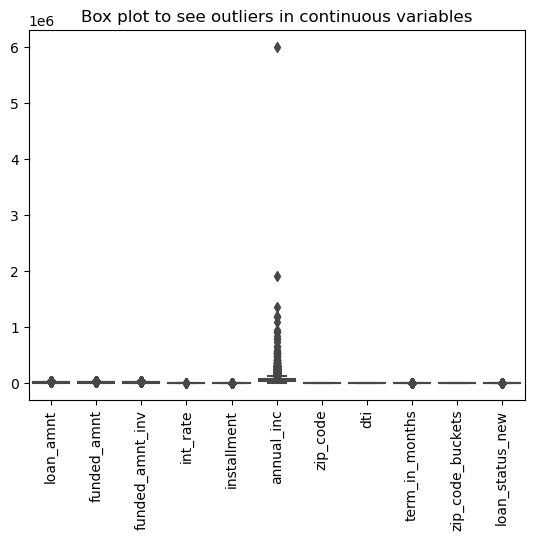

In [52]:
sns.boxplot(data = loan_04)
plt.xticks(rotation='vertical')
plt.title('Box plot to see outliers in continuous variables')
plt.show()

#### From the above graph anual_inc has more outliers compared to other.. let's check this one in individual

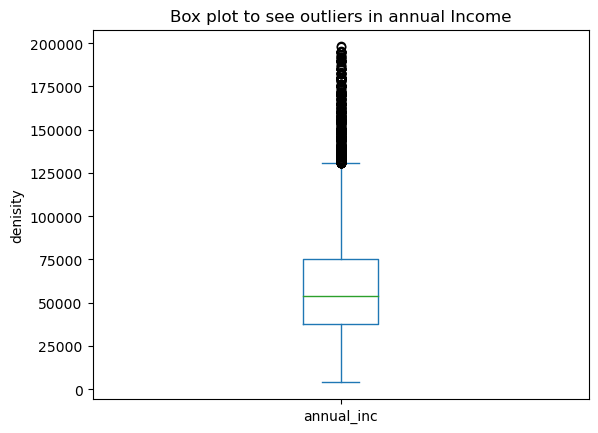

In [59]:
loan_04.annual_inc.plot.box()
plt.title('Box plot to see outliers in annual Income')
plt.ylabel('denisity')
plt.show()

- clearly values above 1000000 are outliers from data.
- removing rows whoe annual_inc greater than 1000000

In [55]:
loan_04 = loan_04[loan_04.annual_inc < 1000000]

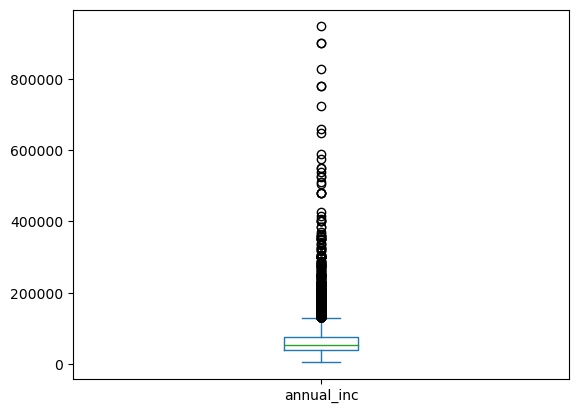

In [56]:
loan_04.annual_inc.plot.box()
plt.show()

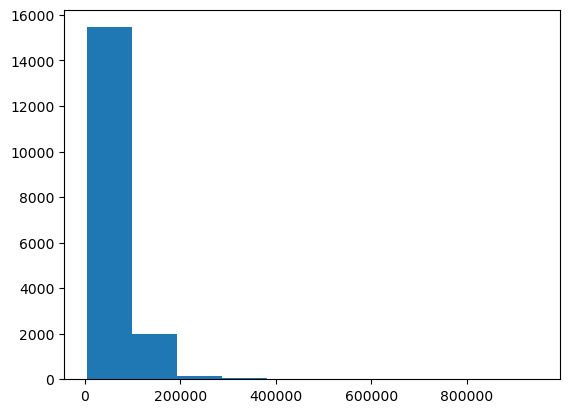

In [57]:
plt.hist(loan_04.annual_inc)
plt.show()

#### In above graph annual_inc not distributed evenly below 100000 bucket huge number entries, also above 200000 income contians very less number of valus, so we can remove those rows from DF

In [58]:
loan_04 = loan_04[loan_04.annual_inc < 200000]

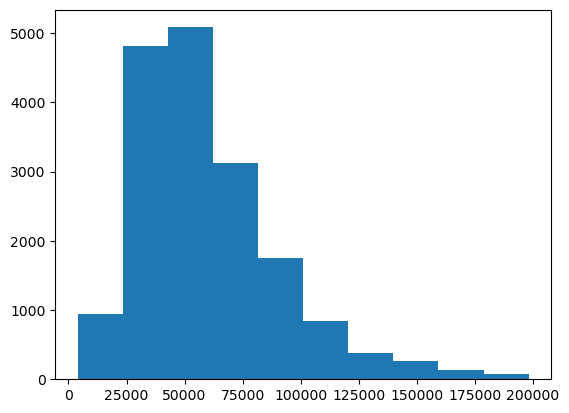

In [58]:
plt.hist(loan_04.annual_inc)
plt.show()

## Univarient Analysis

In [61]:
loan_04.reset_index(inplace=True, drop=True)

In [62]:
loan_05 = loan_04

In [63]:
loan_05.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,term_in_months,issue_year,issue_month,loan_amount_bins,int_rate_bins,annual_inc_bins,dti_bins,installment_bins,zip_code_buckets,loan_status_new
0,2500,2500,2500.0,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309,GA,1.00,60,11,Dec,0-5k,15-18,25-50k,0-5,0,3,0
1,10000,10000,10000.0,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917,CA,20.00,36,11,Dec,5-10k,12-15,25-50k,15-20,2,9,1
2,5000,5000,5000.0,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,My wedding loan I promise to pay back,852,AZ,11.20,36,11,Dec,0-5k,6-9,25-50k,10-15,0,8,1
3,7000,7000,7000.0,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.0,Not Verified,Dec-11,Fully Paid,debt_consolidation,Loan,280,NC,23.51,60,11,Dec,5-10k,15-18,25-50k,20-25,0,2,1
4,3000,3000,3000.0,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.0,Source Verified,Dec-11,Fully Paid,car,Car Downpayment,900,CA,5.35,36,11,Dec,0-5k,18-21,25-50k,5-10,0,9,1


### loan_amnt distribution in given data

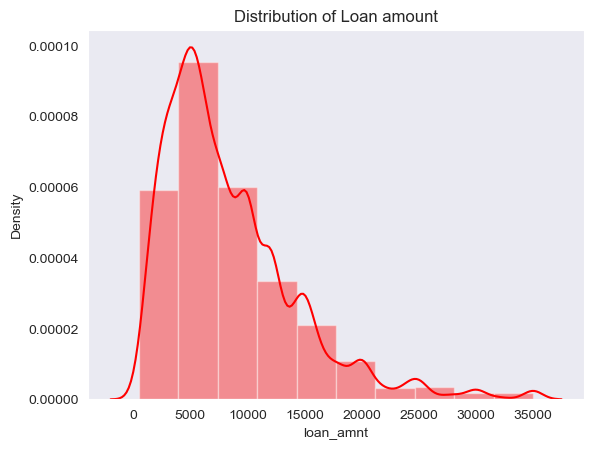

In [65]:
sns.set_style("dark")
sns.distplot(loan_05.loan_amnt, bins=10, color="r")
plt.title("Distribution of Loan amount", fontsize=12)
plt.show()

#### From the above visualiztion we can understand that most of the loans are given between 5000 to 10000

#### Also check loan_amnt distribution for only 'Charged Off' rows

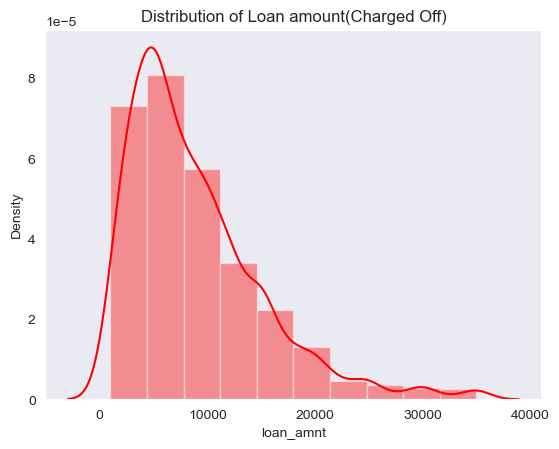

In [67]:
sns.set_style("dark")
sns.distplot(loan_05[loan_05.loan_status == 'Charged Off'].loan_amnt, bins=10, color="r")
plt.title("Distribution of Loan amount(Charged Off)", fontsize=12)
plt.show()

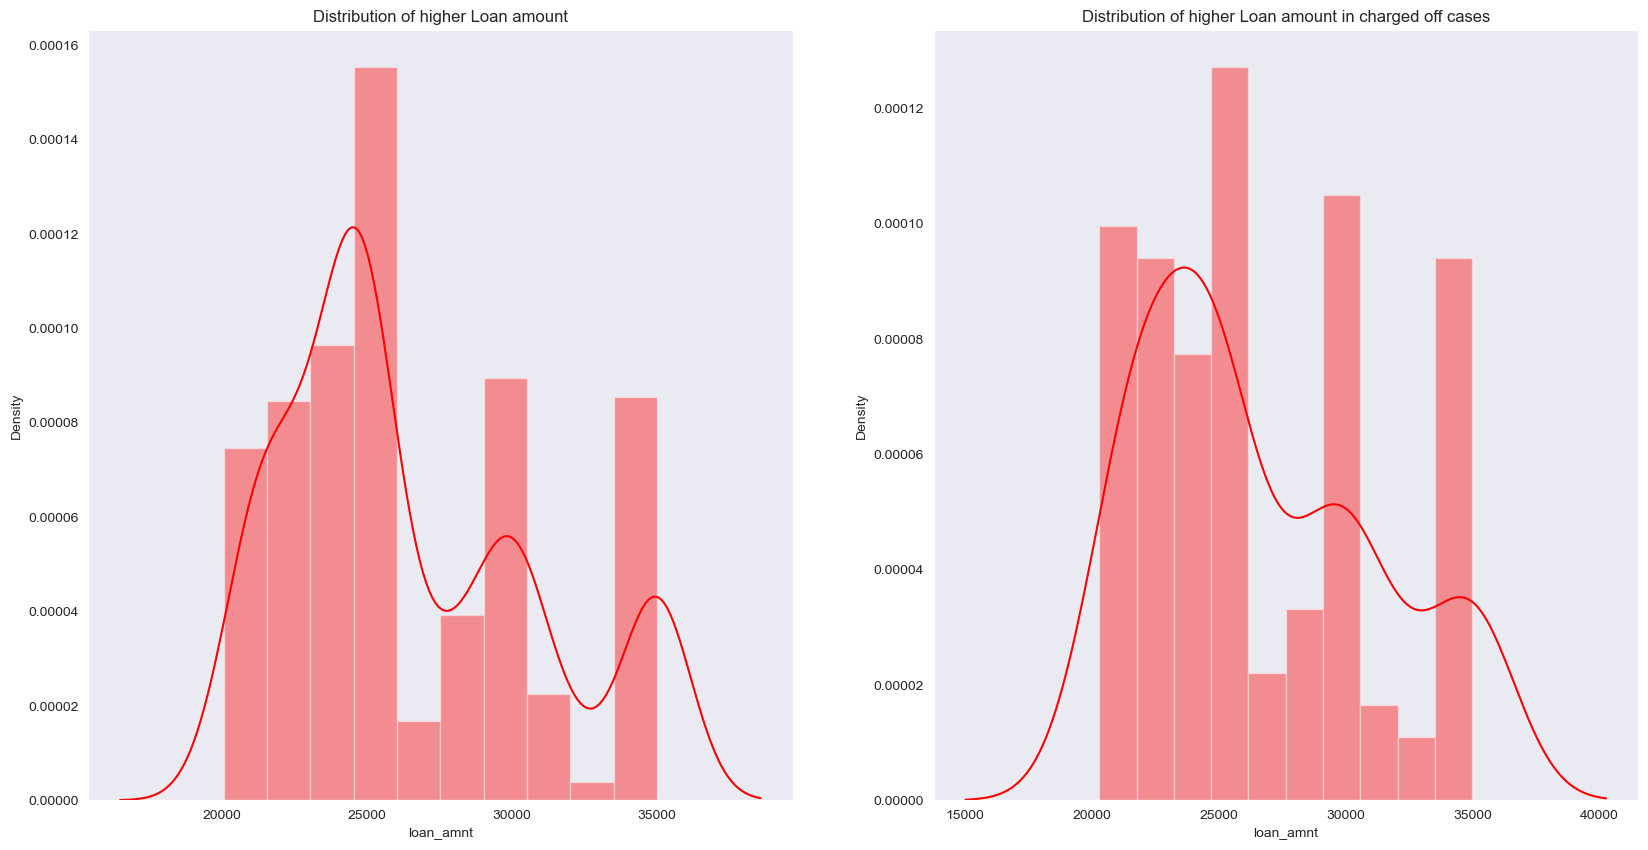

In [68]:
high_ln_amnt = loan_05[loan_05.loan_amnt > 20000]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(high_ln_amnt.loan_amnt, bins=10, color="r", ax=ax1)
ax1.title.set_text("Distribution of higher Loan amount")
sns.distplot(high_ln_amnt[high_ln_amnt.loan_status == 'Charged Off'].loan_amnt, bins=10, color="r" ,ax=ax2)
ax2.title.set_text("Distribution of higher Loan amount in charged off cases")
plt.show()

#### Loan Amount has not much impact on charged off cases, compared to other loans but most of the cases occured in between 5000 to 10000 

### Annual Income

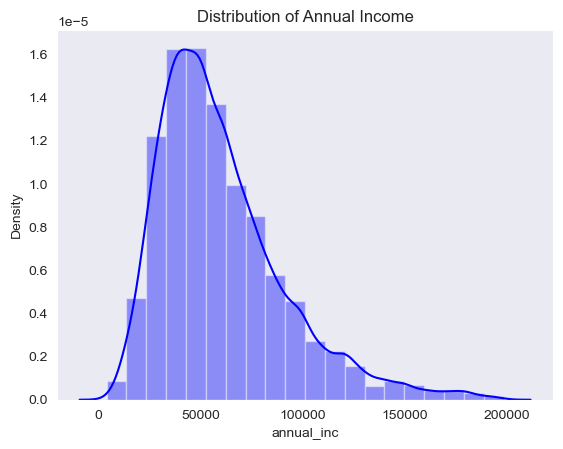

In [65]:
sns.set_style("dark")
sns.distplot(loan_05.annual_inc, bins=20, color="b")
plt.title("Distribution of Annual Income", fontsize=12)
plt.show()

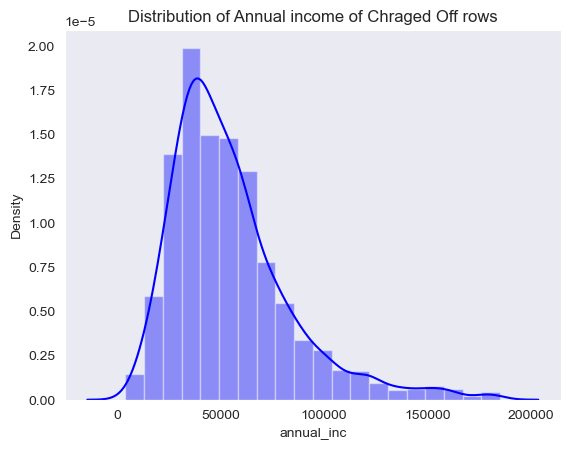

In [66]:
sns.set_style("dark")
sns.distplot(loan_05[loan_05.loan_status == 'Charged Off'].annual_inc, bins=20, color="b")
plt.title("Distribution of Annual income of Chraged Off rows", fontsize=12)
plt.show()

#### Annual Income between 35000 to 66000 more prone to charging off from their loan

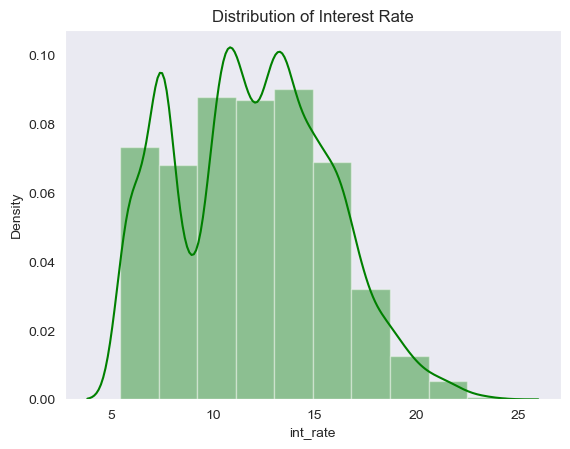

In [67]:
sns.set_style("dark")
sns.distplot(loan_05.int_rate, bins=10, color="g")
plt.title("Distribution of Interest Rate", fontsize=12)
plt.show()

In [68]:
loan_05.int_rate.describe()

count    17456.000000
mean        11.917741
std          3.770548
min          5.420000
25%          8.880000
50%         11.860000
75%         14.650000
max         24.400000
Name: int_rate, dtype: float64

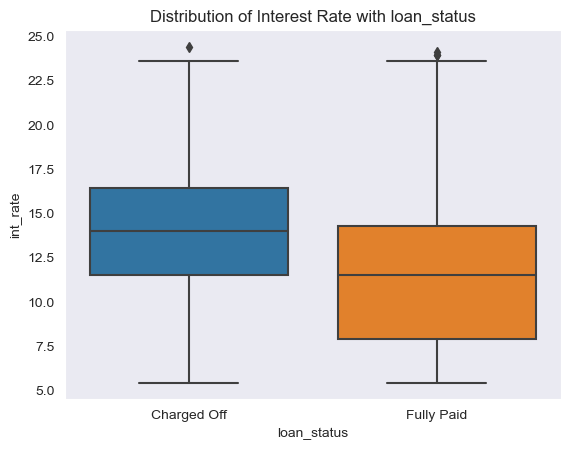

In [69]:
sns.boxplot(y='int_rate',x='loan_status',data= loan_05)
plt.title("Distribution of Interest Rate with loan_status", fontsize=12)
plt.show()

#### Average Interest Rate value of charged off has higher than fully paid rate


### Categorical Variables - Univariate Analysis
- Orderd Categorical variables : grade, sub_grade, emp_length, term
- Unordered Categorical variables : home_ownership, verification_status, purpose, title, zip_code, addr_state

#### Orderd Categorical variables : grade, sub_grade, emp_length

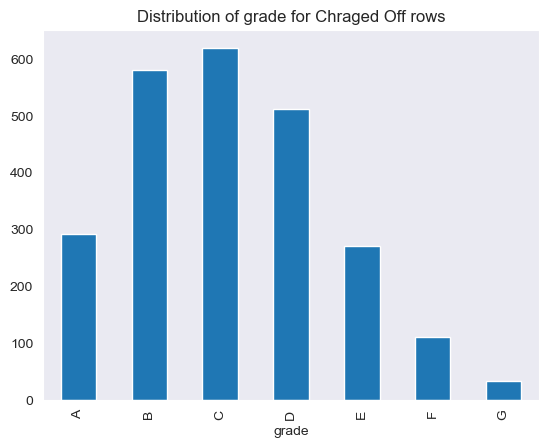

In [70]:
loan_05[loan_05.loan_status == 'Charged Off'].groupby(['grade'])['loan_status'].count().plot.bar()
plt.title("Distribution of grade for Chraged Off rows", fontsize=12)
plt.show()

#### Grade C has high charged off cases

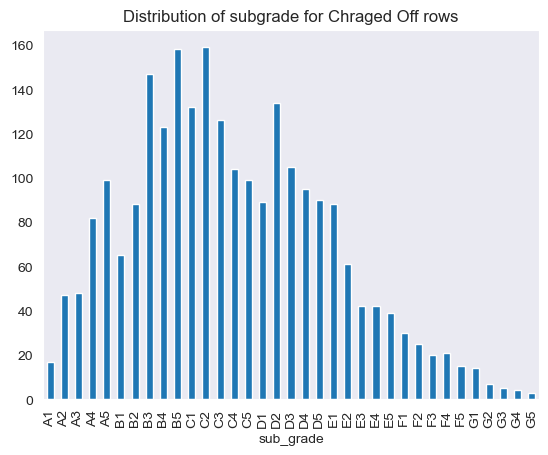

In [71]:
loan_05[loan_05.loan_status == 'Charged Off'].groupby(['sub_grade'])['loan_status'].count().plot.bar()
plt.title("Distribution of subgrade for Chraged Off rows", fontsize=12)
plt.show()

#### sub_grade C2 has highest charged off cases

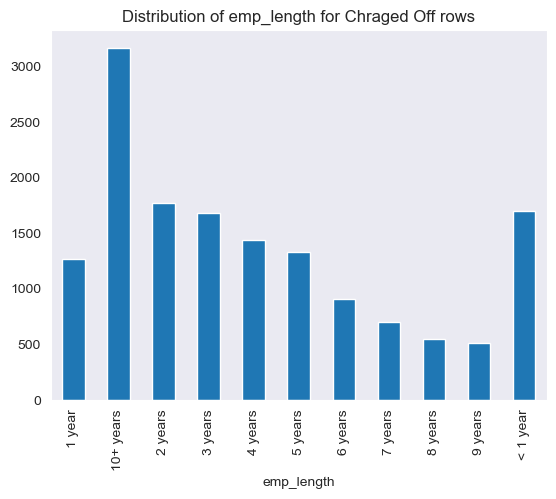

In [72]:
loan_05[loan_05.loan_status_new == 1].groupby(['emp_length'])['loan_status_new'].count().plot.bar()
plt.title("Distribution of emp_length for Chraged Off rows", fontsize=12)
plt.show()

#### More experienced customers has high prone to charged off

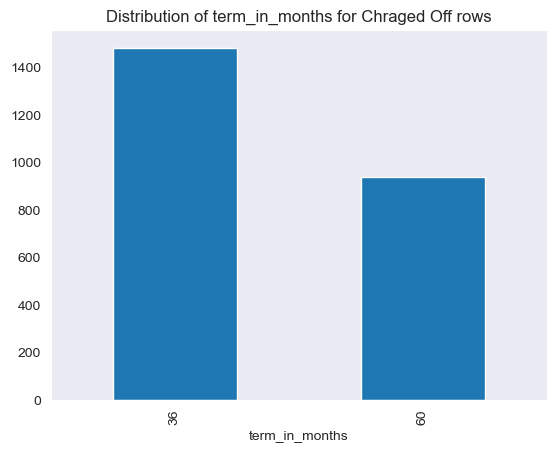

In [75]:
loan_05[loan_05.loan_status == 'Charged Off'].groupby(['term_in_months'])['loan_status'].count().plot.bar()
plt.title("Distribution of term_in_months for Chraged Off rows", fontsize=12)
plt.show()

#### 36months tenure personsons has more chraging off cases

### Unordered Univariate analysis

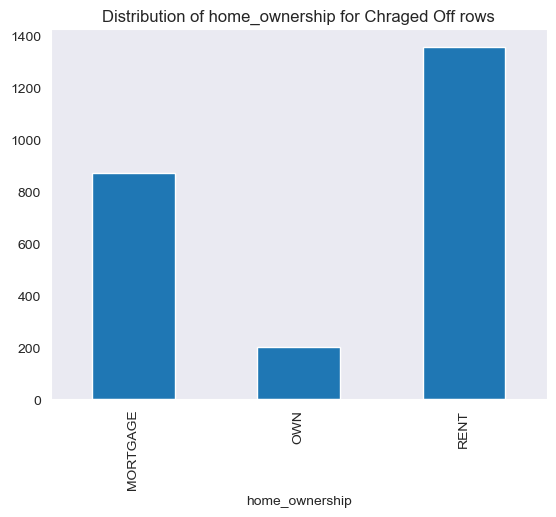

In [76]:
loan_05[loan_05.loan_status == 'Charged Off'].groupby(['home_ownership'])['loan_status'].count().plot.bar()
plt.title("Distribution of home_ownership for Chraged Off rows", fontsize=12)
plt.show()

#### Rented ownership persons have more tends to charged off compare to others

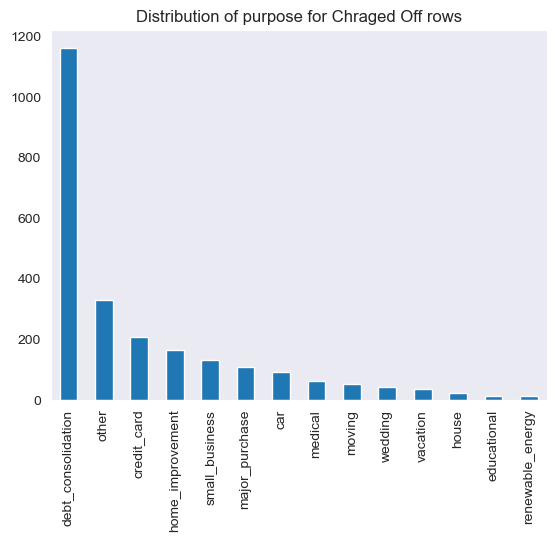

In [82]:
loan_05[loan_05.loan_status == 'Charged Off'].purpose.value_counts().plot.bar()
plt.title("Distribution of purpose for Chraged Off rows", fontsize=12)
plt.show()

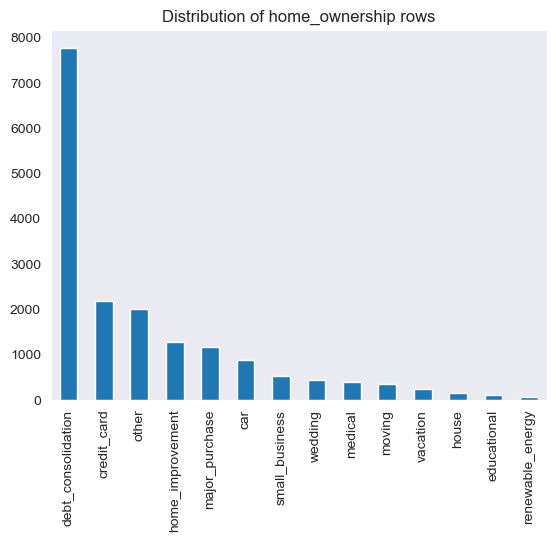

In [83]:
loan_05.purpose.value_counts().plot.bar()
plt.title("Distribution of home_ownership rows", fontsize=12)
plt.show()

- Debt consolidation purpose has high number of loans
- If we compare both the graphs **small_busniess** loans high in **Charged Off** case compared to whole number of loans

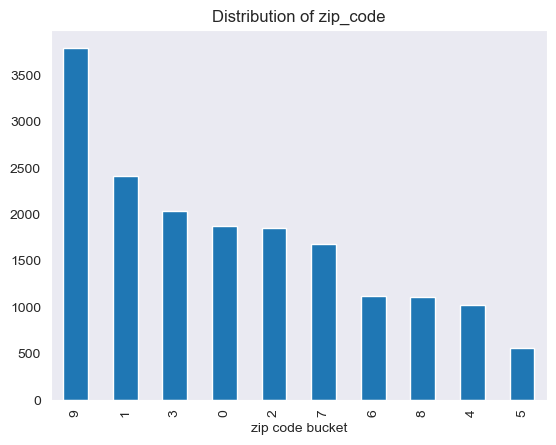

In [85]:
loan_05.zip_code_buckets.value_counts().plot.bar()
plt.title("Distribution of zip_code", fontsize=12)
plt.xlabel("zip code bucket")
plt.show()

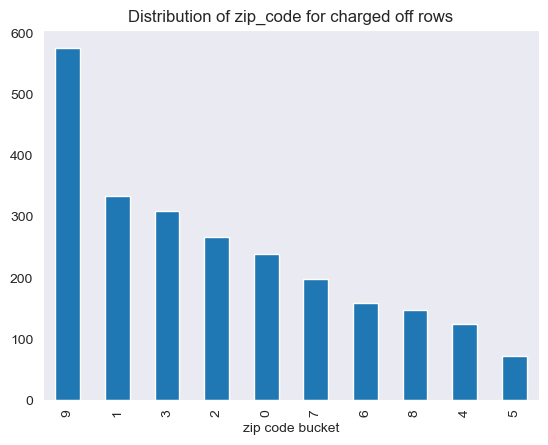

In [86]:
loan_05[loan_05.loan_status == 'Charged Off'].zip_code_buckets.value_counts().plot.bar()
plt.title("Distribution of zip_code for charged off rows", fontsize=12)
plt.xlabel("zip code bucket")
plt.show()

- after comparing both the graphs zip_code 900 -999 are taking more number of loans 

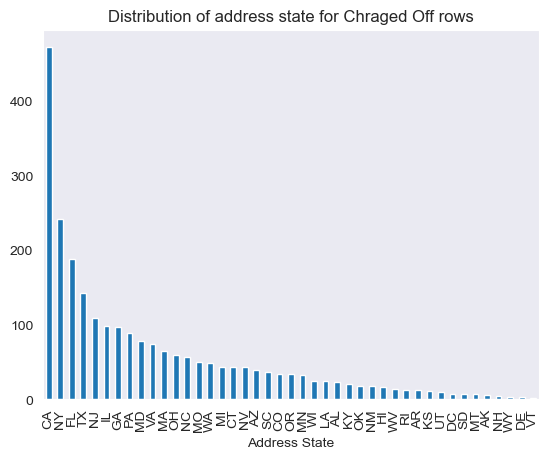

In [87]:
loan_05[loan_05.loan_status == 'Charged Off'].addr_state.value_counts().plot.bar()
plt.title("Distribution of address state for Chraged Off rows", fontsize=12)
plt.xlabel("Address State")
plt.show()

- **CA** state taking more loans and more tends to charged off as well

### Segmented Univariate Analysis

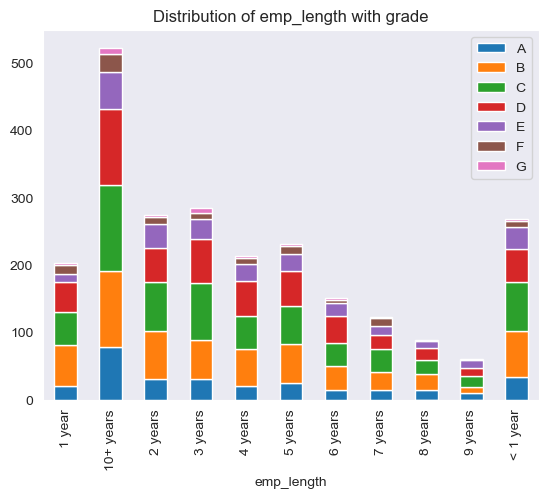

In [88]:
loan_chargedOff = loan_05[loan_05.loan_status == 'Charged Off']
pd.crosstab(loan_chargedOff['emp_length'],loan_chargedOff['grade']).plot.bar(stacked=True)
plt.legend(bbox_to_anchor=(1, 1))
plt.title("Distribution of emp_length with grade", fontsize=12)
plt.show()

- Comparitivly 10+years  c grades are highly **Charged Off** comparitivily others

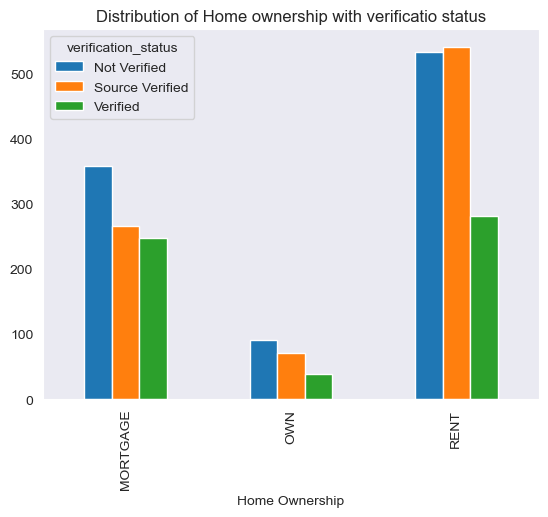

In [90]:
loan_chargedOff = loan_05[loan_05.loan_status == 'Charged Off']
pd.crosstab(loan_chargedOff['home_ownership'],loan_chargedOff['verification_status']).plot.bar()
plt.title("Distribution of Home ownership with verificatio status", fontsize=12)
plt.xlabel("Home Ownership")
plt.show()

- **Rented** and **Source Verified** are more in **Charged Off** data

## Summary of Univariate Analysis
**Below senario users are more tends toward** ****Charging Off****
1. Higher loan amount casues more default cases compare to lower loan_amount
2. Annual Income between 35000 to 66000 more prone to charging off from their loan
3. Average Interest Rate value of charged off has higher than fully paid rate, Higher interest rates may leads to charged off
4. Grade **C** has high charged off cases, sub_grade **C2** has highest charged off cases
5. More expierenced customers(10+ years) has high prone to charged off
6. Rented Source Verified has highest number of Charged Off cases
7. **Debt consolidation** purpose has high number of loans, If we compare both the graphs **small_busniess** loans high in Charged Off case compared to whole number of loans.
8. after comparing both the graphs zip_code 900 -999 are taking more number of Chraged Off loans
9. **CA** state taking more loans and more tends to charged off as well

## Bivariate Analysis

#### Derive results from combination of interestRate and loanAmount and loan_status

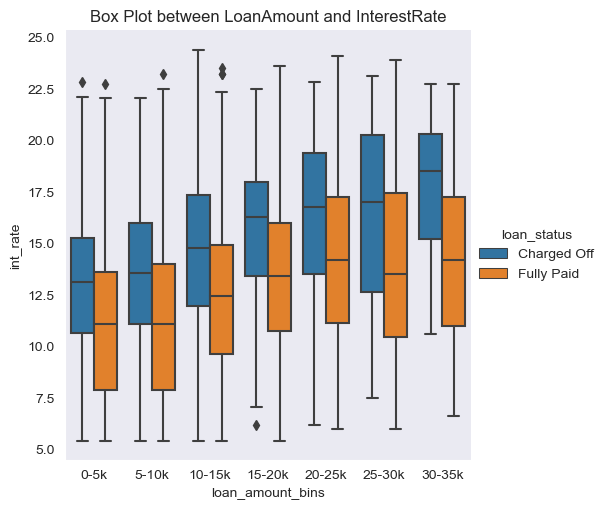

In [75]:
sns.catplot(data=loan_05, x="loan_amount_bins", y="int_rate", hue = 'loan_status', kind="box")
plt.title('Box Plot between LoanAmount and InterestRate')
plt.show()

- From the above box plot we can say that Higher loan amount with higher interest rate leads to ChragedOff cases

#### Derive results from combination of annual_income, loanAmount and loan_status

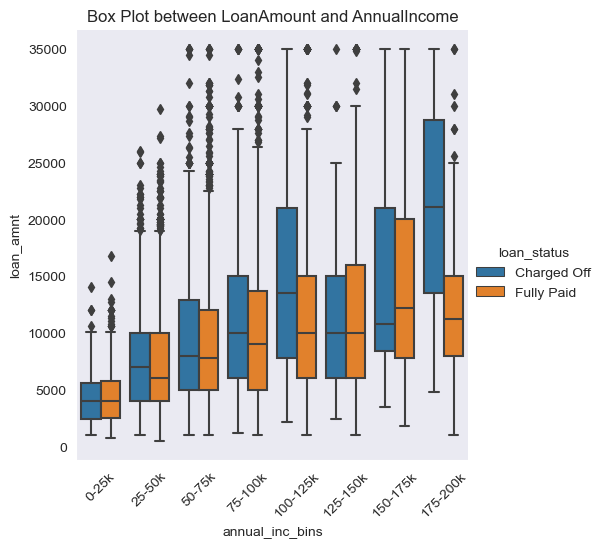

In [76]:
sns.catplot(data=loan_05, x="annual_inc_bins", y="loan_amnt", hue = 'loan_status', kind="box")
plt.xticks(rotation=45)
plt.title('Box Plot between LoanAmount and AnnualIncome')
plt.show()

- Higher Income with higher loan_amount and annual_income leads to Default

#### Derive results from dti, interestrate with laon status


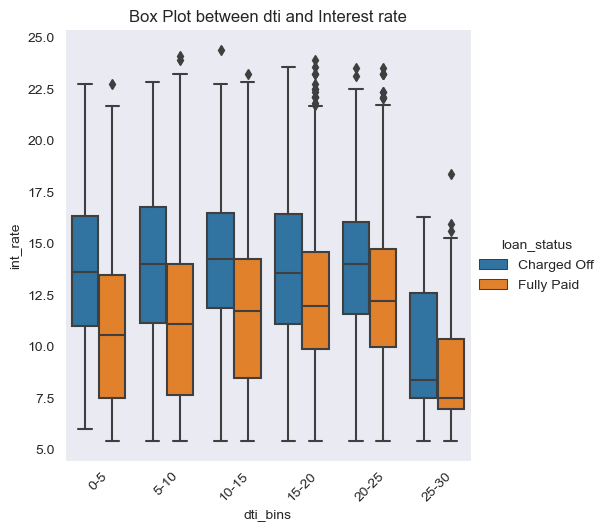

In [77]:
sns.catplot(data=loan_05, x="dti_bins", y="int_rate", hue = 'loan_status', kind="box")
plt.xticks(rotation=45)
plt.title('Box Plot between dti and Interest rate')
plt.show()

- Lower Dti with interest rate between 11-16% leads to Default

#### Derive ralation between home_ownership and emp_length

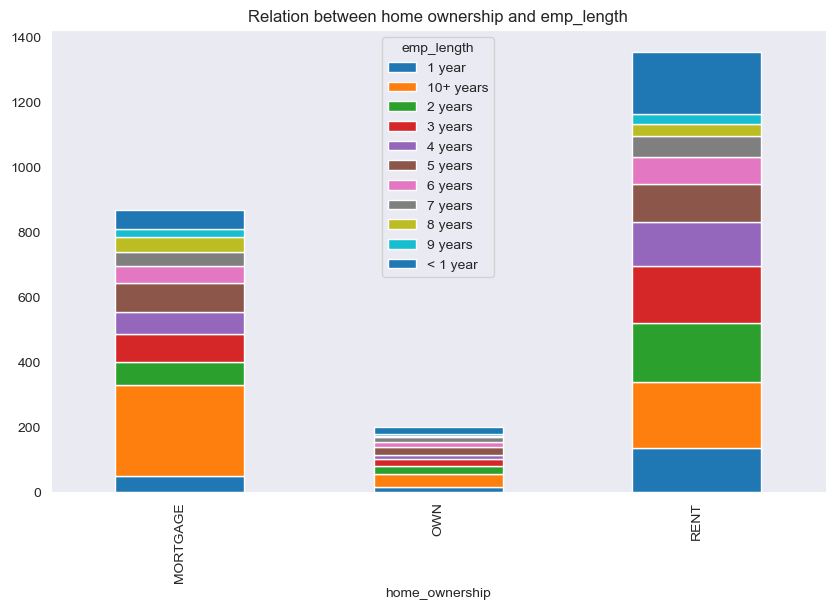

In [92]:
ho_el_pi_0 = pd.pivot_table(data=loan_05[loan_05.loan_status_new==0], values="loan_status", index=['home_ownership'], columns="emp_length", aggfunc='count')
ho_el_pi_0.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title('Relation between home ownership and emp_length')
plt.show()

- More Default cases we can see here in Ownership as Mortgade and emp_length > 10 years


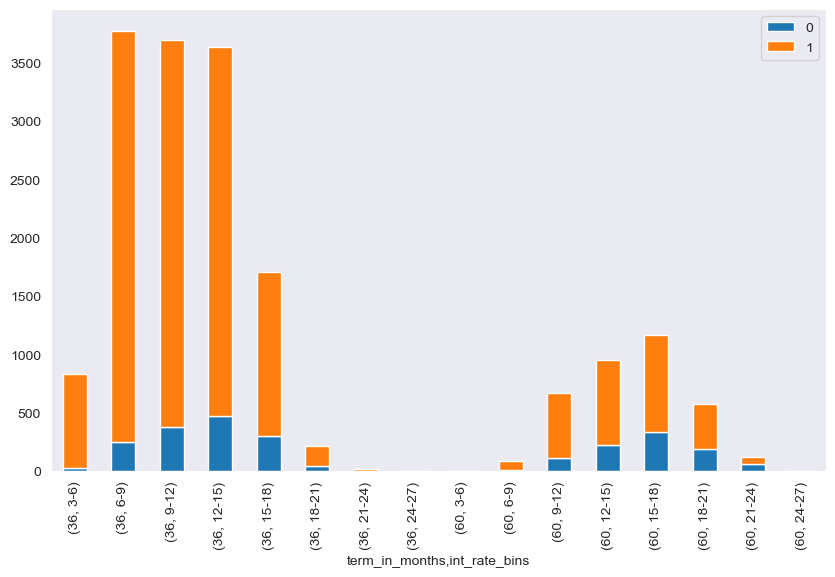

In [79]:
res = pd.pivot_table(data=loan_05, values="loan_status", index=['term_in_months','int_rate_bins'], columns="loan_status_new", aggfunc='count')
res.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

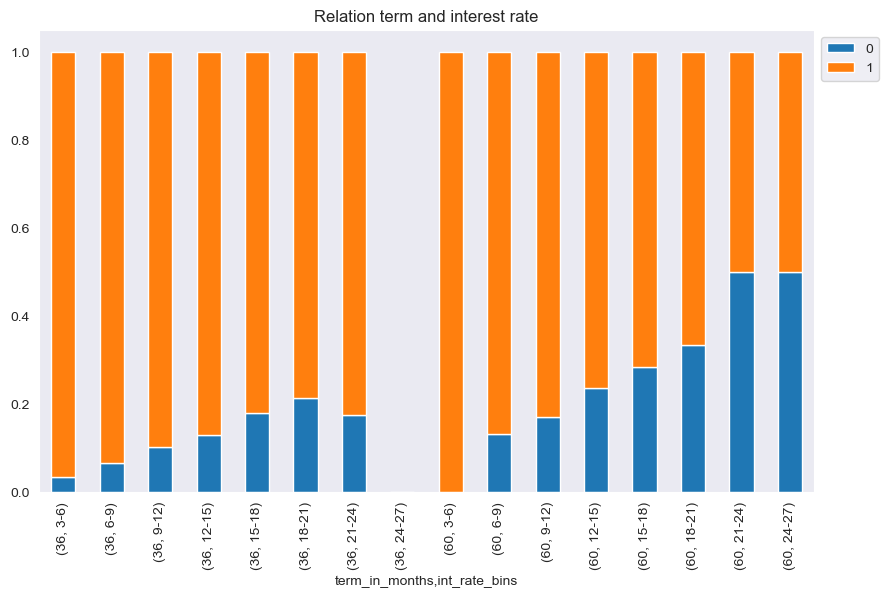

In [93]:
res = pd.pivot_table(data=loan_05, values="loan_status", index=['term_in_months','int_rate_bins'], columns="loan_status_new", aggfunc='count')
res_prc = res[[0,1]].apply(lambda x: x/x.sum(), axis=1)
res_prc.plot(kind="bar", stacked="True", figsize=[10,6])
plt.title('Relation term and interest rate')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### high interestrate with 60 months tenure has high probability of 'Charged Off'

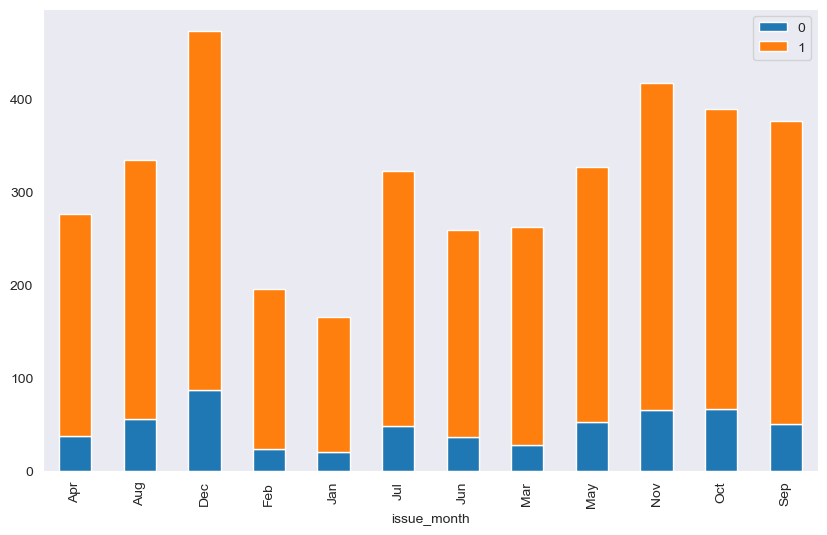

In [81]:
loan_ca =loan_05[loan_05.zip_code_buckets == 9]
res = pd.pivot_table(data=loan_ca, values="loan_status", index=['issue_month'], columns="loan_status_new", aggfunc='count')
res.plot(kind="bar", stacked="True", figsize=[10,6])
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

#### ZipCode in 900 -999 range highest number of default cases Comparitvily high in December month

#### For whole annual income range term with 60 months has highest propbability to Default

## Summary of Bivariate analysis
- Higher loan amount with higher interest rate leads to ChragedOff cases
- Higher Income with higher loan_amount and annual_income leads to Default
- Lower Dti with interest rate between 11-16% leads to Default
- More Default cases we can see here in Ownership as Mortgade and emp_length > 10 years
- high interestrate with 60 months tenure has high probability of 'Charged Off'
- ZipCode in 900 -999 range(CA state) highest number of default cases Comparitvily high in December month
